In [124]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [6]:
def RGBtoYCbCr(picture):
    YCbCrpicture = np.copy(picture)
    for x, row in enumerate(YCbCrpicture):
        for y, col in enumerate(row):
            YCbCrpicture[x][y][0] = 0.299 * picture[x][y][0] + 0.587 * picture[x][y][1] + 0.114 * picture[x][y][2]
            YCbCrpicture[x][y][1] = 128 - 0.168736 * picture[x][y][0] - 0.331264 * picture[x][y][1] + 0.5 * picture[x][y][2]
            YCbCrpicture[x][y][2] = 128 + 0.5 * picture[x][y][0] - 0.418688 * picture[x][y][1] - 0.081312 * picture[x][y][2]
    return YCbCrpicture

In [7]:
def YCbCrtoRGB(picture):
    RGBpicture = np.copy(picture)
    for x, row in enumerate(RGBpicture):
        for y, col in enumerate(row):
            RGBpicture[x][y][0] = picture[x][y][0] + 1.402 * (picture[x][y][2] - 128) 
            RGBpicture[x][y][1] = picture[x][y][0] - 0.34414 * (picture[x][y][1] - 128) - 0.71414 * (picture[x][y][2] - 128)
            RGBpicture[x][y][2] = picture[x][y][0] + 1.772   * (picture[x][y][1] - 128)
    return RGBpicture

In [113]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')
peppers = misc.imread('images/peppers.png')
face = misc.imread('images/face.jpg')
face2 = misc.imread('images/face1.jpg')
ex = misc.imread('images/ex.jpg')

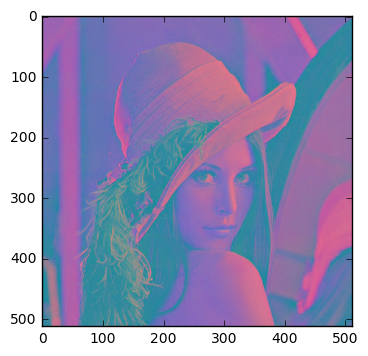

In [9]:
s3 = RGBtoYCbCr(lena)
plt.imshow(s3)
plt.show()

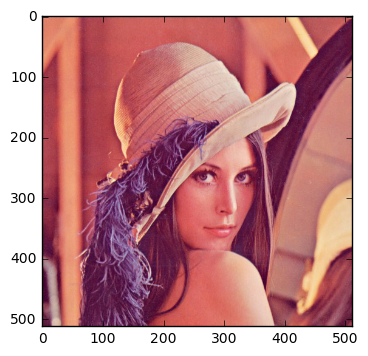

In [10]:
s4 = YCbCrtoRGB(RGBtoYCbCr(lena))
plt.imshow(s4)
plt.show()

In [11]:
def RGBtoHLS(picture):
    HLSpicture = np.copy(picture)
    for x, row in enumerate(HLSpicture):
        for y, col in enumerate(row):
            HLSpicture[x][y][0] = (maxp(picture,x,y)+minp(picture,x,y))/2
            if (HLSpicture[x][y][0] < 0.5):
                HLSpicture[x][y][1] = (maxp(picture,x,y)-minp(picture,x,y))/(maxp(picture,x,y)+minp(picture,x,y))
            if (HLSpicture[x][y][0] >= 0.5):
                HLSpicture[x][y][1] = (maxp(picture,x,y)-minp(picture,x,y))/2-(maxp(picture,x,y)+minp(picture,x,y))
            if (maxp(picture,x,y) == picture[x][y][0]):
                HLSpicture[x][y][2] = (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
            if (maxp(picture,x,y) == picture[x][y][1]):
                HLSpicture[x][y][2] = 120 + (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
            if (maxp(picture,x,y) == picture[x][y][2]):
                HLSpicture[x][y][2] = 240 + 120 + (60*(picture[x][y][1]-picture[x][y][2]))/HLSpicture[x][y][1]
    return HLSpicture

In [12]:
def maxp (picture,x,y):
    return max(max(picture[x][y][0],picture[x][y][1]),picture[x][y][2])

In [13]:
def minp (picture,x,y):
    return min(min(picture[x][y][0],picture[x][y][1]),picture[x][y][2])

C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in long_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide 

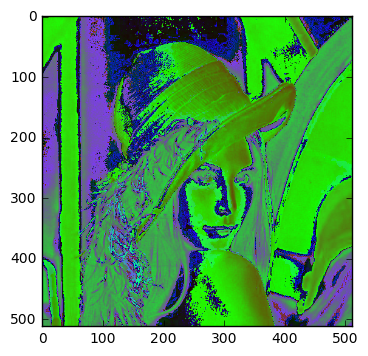

In [14]:
s3 = RGBtoHLS(lena)
plt.imshow(s3)
plt.show()

In [119]:
def newRGBtoHLS(picture):
    HLSpicture = np.copy(picture)
    for x, row in enumerate(HLSpicture):
        for y, col in enumerate(row):
            R = picture[x][y][0]
            G = picture[x][y][1]
            B = picture[x][y][2]
            maxRGB = max(max(R,G),B)
            minRGB = min(min(R,G),B)
            suma = maxRGB + minRGB
            roznica = maxRGB - minRGB
            HLSpicture[x][y][0] = ((maxRGB + minRGB)/2)%255 #L
            if (HLSpicture[x][y][0] < 0.5): #S
                if (suma == 0):
                    HLSpicture[x][y][1] = 0
                else: 
                    HLSpicture[x][y][1] = ((maxRGB - minRGB)/(maxRGB + minRGB))
            if (HLSpicture[x][y][0] >= 0.5):
                if (suma == 2):
                    HLSpicture[x][y][1] = 0
                else:
                    HLSpicture[x][y][1] = ((maxRGB - minRGB)/ 2 - (maxRGB + minRGB))
            if (HLSpicture[x][y][1] == 0):
                HLSpicture[x][y][1] = 1
            if (maxRGB == R): #H
                HLSpicture[x][y][2] = ((60*(G-B))/HLSpicture[x][y][1])
            elif (maxRGB == G):
                HLSpicture[x][y][2] = (120 + ((60*(G-B))/HLSpicture[x][y][1]))
            else:
                HLSpicture[x][y][2] = (240 + ((60*(G-B))/HLSpicture[x][y][1]))
    return HLSpicture

C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: overflow encountered in ubyte_scalars


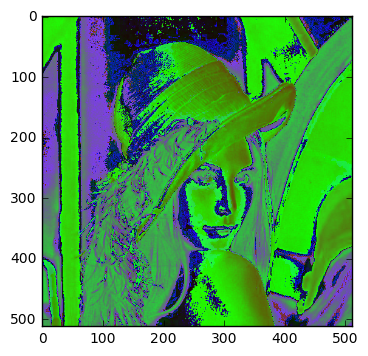

In [120]:
s3 = newRGBtoHLS(lena)
plt.imshow(s3)
plt.show()

In [17]:
def HLS(picture,rgb):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            save = col[rgb]
            col[0] = col[1] = col[2] = 0
            col[rgb] = save
    return grey_picture

In [117]:
def newnewRGBtoHLS(picture):
    HLSpicture = np.copy(picture)
    for x, row in enumerate(HLSpicture):
        for y, col in enumerate(row):
            R = HLSpicture[x][y][0]
            G = HLSpicture[x][y][1]
            B = HLSpicture[x][y][2]
            maxRGB = max(max(R,G),B)
            minRGB = min(min(R,G),B)
            suma = maxRGB + minRGB
            roznica = maxRGB - minRGB
            HLSpicture[x][y][0] = ((maxRGB + minRGB)/2)%255 #L
            if (roznica == 0): #S
                HLSpicture[x][y][1] = 0
            else: 
                    HLSpicture[x][y][1] = roznica/(1-np.abs(suma-1))
            if (HLSpicture[x][y][1] == 0):
                HLSpicture[x][y][1] = 1
            if (maxRGB == R): #H
                HLSpicture[x][y][2] = ((60*(G-B))/HLSpicture[x][y][1])
            elif (maxRGB == G):
                HLSpicture[x][y][2] = (120 + ((60*(G-B))/HLSpicture[x][y][1]))
            else:
                HLSpicture[x][y][2] = (240 + ((60*(G-B))/HLSpicture[x][y][1]))
    return HLSpicture

In [59]:
def justGreen(picture):
    greenpicture = np.copy(picture)
    for x, row in enumerate(greenpicture):
        for y, col in enumerate(row):
            R = picture[x][y][0]
            G = picture[x][y][1]
            B = picture[x][y][2]
            maxRGB = max(max(R,G),B)
            if (maxRGB != G):
                greenpicture[x][y][0] = 255
                greenpicture[x][y][1] = 255
                greenpicture[x][y][2] = 255
    return greenpicture

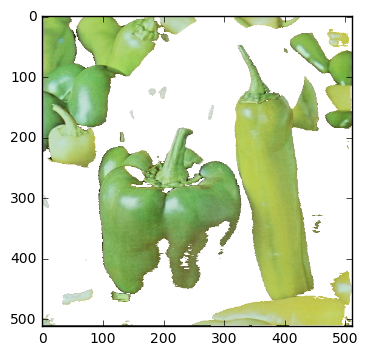

In [60]:
g1 = justGreen(peppers)
plt.imshow(g1)
plt.show()

In [ ]:
def face(picture):
    facepic = np.copy(picture)
    for x, row in enumerate(facepic):
        for y, col in enumerate(row):
            R = picture[x][y][0]
            G = picture[x][y][1]
            B = picture[x][y][2]
            maxRGB = max(max(R,G),B)
            if (maxRGB != G):
                greenpicture[x][y][0] = 255
                greenpicture[x][y][1] = 255
                greenpicture[x][y][2] = 255
    return greenpicture

In [111]:
def redEyes(picture):
    redpicture = np.copy(picture)
    for x, row in enumerate(redpicture):
        for y, col in enumerate(row):
            R = picture[x][y][0]
            G = picture[x][y][1]
            B = picture[x][y][2]
            maxRGB = max(max(R,G),B)
            srednia = int(int(int(R)+int(G)+int(B))/3)
            if ((int(R+R)-int(G+B)) > 0):
                redpicture[x][y][0] = srednia
                redpicture[x][y][1] = srednia
                redpicture[x][y][2] = srednia
    for x, row in enumerate(redpicture):
        for y, col in enumerate(row):
            R = picture[x][y][0]
            G = picture[x][y][1]
            B = picture[x][y][2]
            maxRGB = max(max(R,G),B)
            srednia = int(int(int(R)+int(G)+int(B))/3)
            if (B == maxRGB):
                redpicture[x][y][0] = srednia
                redpicture[x][y][1] = srednia
                redpicture[x][y][2] = srednia
    return redpicture

C:\Users\Aleksandra\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in ubyte_scalars


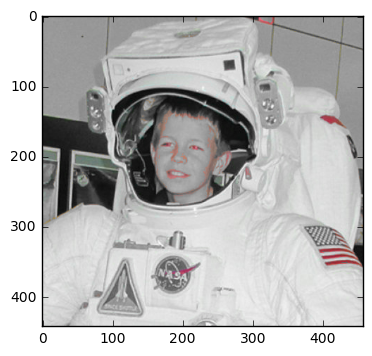

In [112]:
g2 = redEyes(face2)
plt.imshow(g2)
plt.show()